# Clustering

## KMeans

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

df = pd.read_csv('./data/tweet-clean.csv')

with open('stopwords-id.json', 'r') as f:
    stopwords = json.load(f)

print(len(stopwords))
df.head()

758


,id,name,username,date,reply_to,content,reply,retweet,like,lang,mentions,content_clean
0,DedenSujanaFeb12021Simak b,Deden Sujana,@dedensujana,2021-02-01,NaN,Simak bagaimana sikap Khilafah Ahmadiyah terha...,0,1,2,id,@Iskandargumay1,Simak bagaimana sikap Khilafah Ahmadiyah terha...
1,MuridIslamAhmadiyahFeb12021nah say,MuridIslamAhmadiyah,@MAhmadiyah,2021-02-01,@akbarnugrohoa,nah saya ulang ya. silahkan temukan pernyataan...,1,0,0,id,NaN,nah saya ulang ya. silahkan temukan pernyataan...
2,risrisismanFeb12021Sebenar,risris isman,@risrisus,2021-02-01,@susipudjiastuti,Sebenarnya mengomentari \n@permadiaktivis1\n l...,0,0,1,id,@permadiaktivis1,Sebenarnya mengomentari lebih politis dari pad...
3,MuridIslamAhmadiyahJan312021adakah,MuridIslamAhmadiyah,@MAhmadiyah,2021-01-31,@akbarnugrohoa,adakah pernyataan dari Ahmadiyah bahwa nabi pe...,0,0,0,id,NaN,adakah pernyataan dari Ahmadiyah bahwa nabi pe...
4,MuridIslamAhmadiyahJan312021itu vid,MuridIslamAhmadiyah,@MAhmadiyah,2021-01-31,@akbarnugrohoa,itu video udh video udh menjelaskan penafsiran...,1,0,0,id,NaN,itu video udh video udh menjelaskan penafsiran...


## KMeans only

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf = TfidfVectorizer(stop_words=stopwords)

df_content = df['content_clean'][~df.content_clean.isna()]

csr_mat = tfidf.fit_transform(df_content)

D:\equipments\miniconda\envs\iddzzz\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [3]:
# kmeans = KMeans(n_clusters=12)
# kmeans.fit(csr_mat)
# labels = kmeans.predict(csr_mat)

In [4]:
# x = [i for i in range(10, 100, 10)]
# y = []

# for i in tqdm(x):
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(csr_mat)
#     y.append(kmeans.inertia_)


In [5]:
# fig = plt.figure(figsize=(12, 6))
# plt.plot(x, y)
# plt.xlabel("n clusters")
# plt.ylabel("inertia")
# plt.xticks()
# plt.show()

## KMeans with NMF

In [23]:
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

nmf = NMF(n_components=10, init='nndsvd', max_iter=500)

x = [i for i in range(4, 102, 2)]
y = []

for i in tqdm(x):
    kmeans = KMeans(n_clusters=i)
    norm = Normalizer()
    pipeline = make_pipeline(nmf, norm, kmeans)
    pipeline.fit(csr_mat)
    y.append(kmeans.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [03:57<00:00,  4.85s/it]


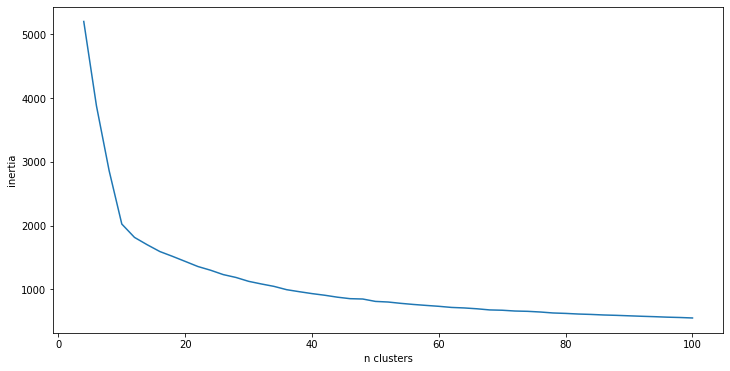

In [24]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.xlabel("n clusters")
plt.ylabel("inertia")
plt.xticks()
plt.show()